In [1]:

import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from tensorflow import keras
from tensorflow.keras import models, layers, Sequential
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load Dataset

In [2]:
# Load object Detection dataset

dataset = kagglehub.dataset_download('gjeevanm/object-detection-dataset')

train_path = dataset + '/tusimple_preprocessed/training'


100%|██████████| 1.34G/1.34G [01:01<00:00, 23.3MB/s]

Extracting files...


In [3]:
# Create a generator and get the images from the directory
img_generator = keras.preprocessing.image.ImageDataGenerator()
seed = 10
images_set = img_generator.flow_from_directory(
    train_path,
    shuffle=False,
    batch_size=64,
    class_mode='binary',
    target_size=(256, 320)
)

Found 7252 images belonging to 2 classes.


Found 7252 images belonging to 2 classes.


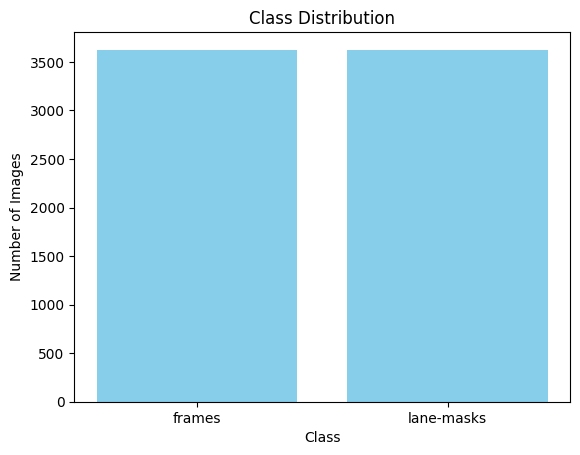

Class Counts: Counter({0: 3626, 1: 3626})


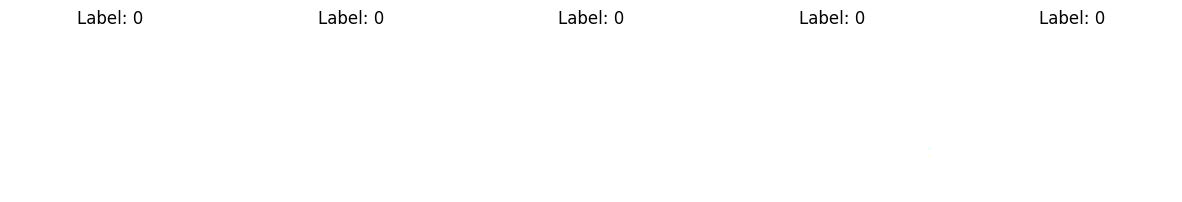

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Extract class distribution from the ImageDataGenerator object
def class_distribution(generator):
    class_counts = Counter(generator.classes)
    class_labels = list(generator.class_indices.keys())

    # Plot class distribution
    plt.bar(class_labels, class_counts.values(), color='skyblue')
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.show()

    print(f"Class Counts: {class_counts}")
    return class_counts

# Visualize sample images from the generator
def visualize_images(generator, num_images=5):
    images, labels = next(generator)
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {int(labels[i])}")
        plt.axis('off')
    plt.show()

# Run EDA
class_counts = class_distribution(img_generator.flow_from_directory(
    train_path,
    shuffle=False,
    batch_size=64,
    class_mode='binary',
    target_size=(256, 320)
))
visualize_images(images_set, num_images=5)

Found 7252 images belonging to 2 classes.


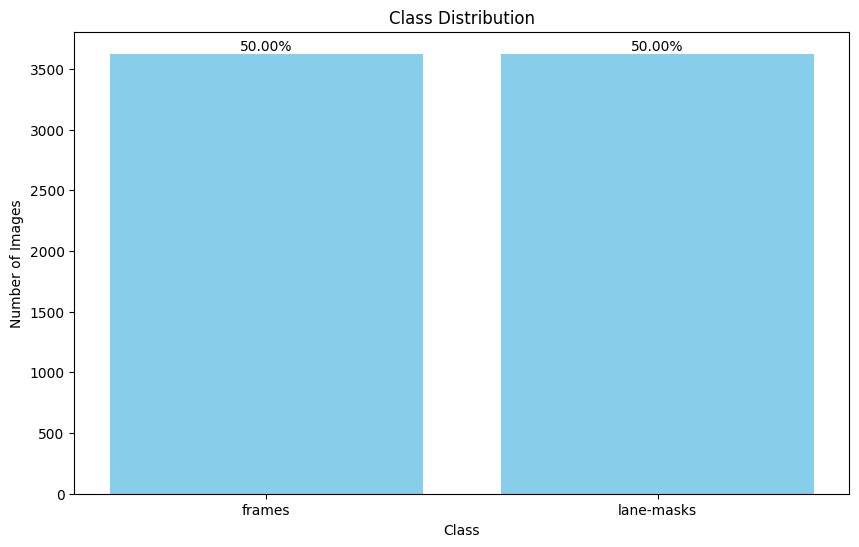

Class Counts: Counter({0: 3626, 1: 3626})
Total Images: 7252


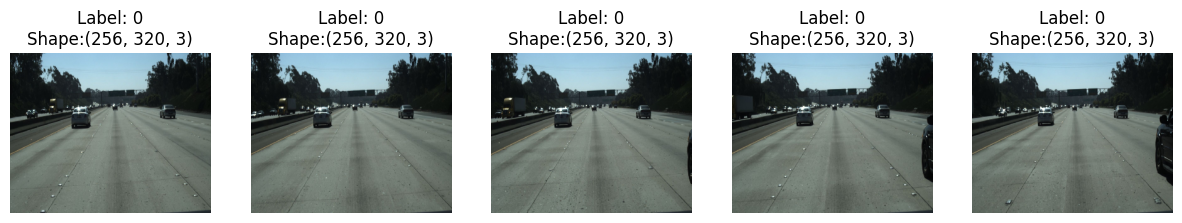

Image shapes (first batch):
Counter({(256, 320, 3): 64})


In [15]:
# Enhance EDA

import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from tensorflow import keras
from tensorflow.keras import models, layers, Sequential
import tensorflow as tf
from collections import Counter

# Load Dataset
# Load object Detection dataset
try:
    dataset = kagglehub.dataset_download('gjeevanm/object-detection-dataset')
    train_path = dataset + '/tusimple_preprocessed/training'
except Exception as e:
    print(f"Error downloading or accessing dataset: {e}")
    print("Please ensure you have the 'kaggle' CLI tool configured and the dataset exists.")
    train_path = "/path/to/your/local/dataset" # Replace with your local dataset path


# Create a generator and get the images from the directory
img_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255) # Normalize pixel values

def analyze_image_data(train_path, target_size=(256,320)):
    try:
      images_set = img_generator.flow_from_directory(
          train_path,
          shuffle=False,
          batch_size=64,
          class_mode='binary',
          target_size=target_size
      )

      # Extract class distribution from the ImageDataGenerator object
      class_counts = Counter(images_set.classes)
      class_labels = list(images_set.class_indices.keys())
      total_images = sum(class_counts.values())

      # Enhanced Class Distribution Plot
      plt.figure(figsize=(10, 6))
      plt.bar(class_labels, class_counts.values(), color='skyblue')
      plt.title("Class Distribution")
      plt.xlabel("Class")
      plt.ylabel("Number of Images")
      for i, count in enumerate(class_counts.values()):
          percentage = (count / total_images) * 100
          plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')  # Display percentage
      plt.show()


      print(f"Class Counts: {class_counts}")
      print(f"Total Images: {total_images}")

      # Enhanced image visualization with more info
      images, labels = next(images_set)
      plt.figure(figsize=(15, 5))

      for i in range(min(5, len(images))):  # Ensure it doesn't try to access an out-of-bounds index
          plt.subplot(1, min(5, len(images)), i + 1)
          plt.imshow(images[i])
          plt.title(f"Label: {int(labels[i])}\nShape:{images[i].shape}")
          plt.axis('off')
      plt.show()


      # Image Shape Analysis
      img_shapes = [img.shape for img in images]
      print(f"Image shapes (first batch):\n{Counter(img_shapes)}")

    except Exception as e:
        print(f"Error during EDA: {e}")

analyze_image_data(train_path)

Found 7252 images belonging to 2 classes.


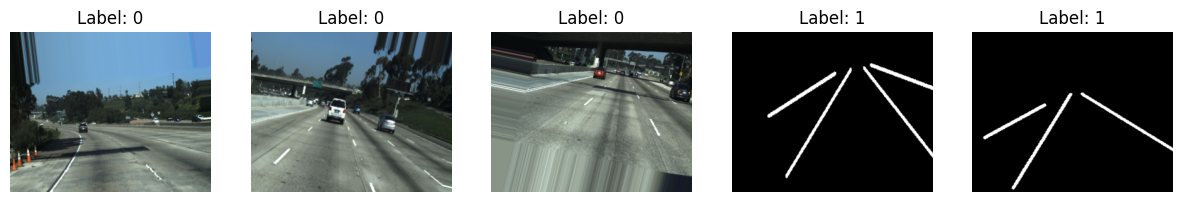

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define an ImageDataGenerator with data augmentation
data_gen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize images to [0, 1]
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Apply shear transformations
    zoom_range=0.2,  # Randomly zoom in
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill pixels after transformations
)

# Apply the generator to the training directory
augmented_generator = data_gen.flow_from_directory(
    train_path,
    target_size=(256, 320),
    batch_size=64,
    class_mode='binary'
)

# Display augmented images for verification
def visualize_augmented_images(generator, num_images=5):
    images, labels = next(generator)
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {int(labels[i])}")
        plt.axis('off')
    plt.show()

visualize_augmented_images(augmented_generator)

In [6]:
images, labels = next(augmented_generator)
images = images / 255.0  # Normalize pixel values

Found 7252 images belonging to 2 classes.


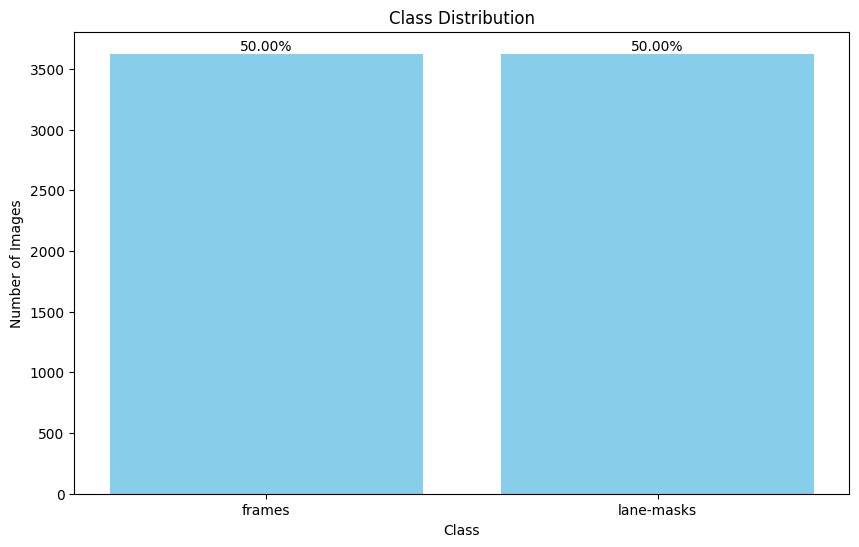

Class Counts: Counter({0: 3626, 1: 3626})
Total Images: 7252


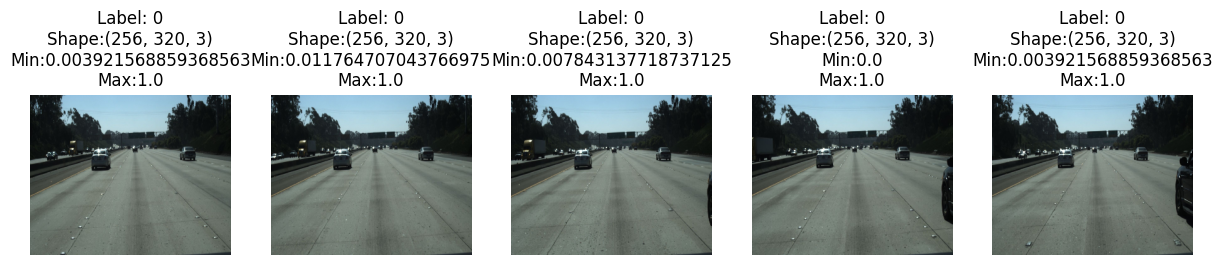

Image shapes (first batch):
Counter({(256, 320, 3): 64})


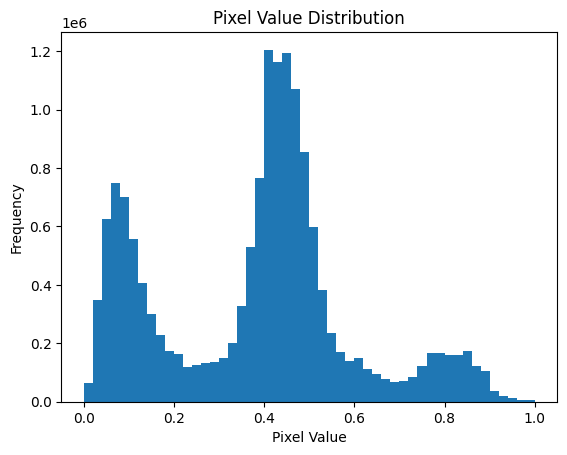

In [16]:
# Enhance Pre-processing

def analyze_image_data(train_path, target_size=(256, 320)):
    try:
        images_set = img_generator.flow_from_directory(
            train_path,
            shuffle=False,
            batch_size=64,
            class_mode='binary',
            target_size=target_size
        )

        class_counts = Counter(images_set.classes)
        class_labels = list(images_set.class_indices.keys())
        total_images = sum(class_counts.values())

        # Enhanced Class Distribution Plot with percentages
        plt.figure(figsize=(10, 6))
        plt.bar(class_labels, class_counts.values(), color='skyblue')
        plt.title("Class Distribution")
        plt.xlabel("Class")
        plt.ylabel("Number of Images")
        for i, count in enumerate(class_counts.values()):
            percentage = (count / total_images) * 100
            plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')
        plt.show()

        print(f"Class Counts: {class_counts}")
        print(f"Total Images: {total_images}")

        # Enhanced image visualization with more details
        images, labels = next(images_set)
        plt.figure(figsize=(15, 5))
        for i in range(min(5, len(images))):
            plt.subplot(1, min(5, len(images)), i + 1)
            plt.imshow(images[i])
            plt.title(f"Label: {int(labels[i])}\nShape:{images[i].shape}\nMin:{images[i].min()}\nMax:{images[i].max()}")
            plt.axis('off')
        plt.show()

        # More detailed image shape and value analysis
        img_shapes = [img.shape for img in images]
        print(f"Image shapes (first batch):\n{Counter(img_shapes)}")

        # Analyze pixel value distribution (optional, can be computationally intensive)
        pixel_values = np.concatenate([img.flatten() for img in images])
        plt.hist(pixel_values, bins=50)
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")
        plt.title("Pixel Value Distribution")
        plt.show()


    except Exception as e:
        print(f"Error during EDA: {e}")

# Example usage (assuming 'train_path' is defined correctly)
analyze_image_data(train_path)